<a href="https://colab.research.google.com/github/oleksandrkuzmychov/DL_2024_Kuzmychov/blob/main/Lab1_DL_Kuzmychov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
## Активації

# Сигмоїда
def sgd(x):
    return 1/(1 + np.exp(-x))
# Фрагмент функції Ф(x)
def frag(x):
    return np.sqrt(2/np.pi)*(x + 0.044715*x**3)

# ReLU
def relu(x):
    return np.maximum(0, x)

def relu_d(x):
    return 1 if x >= 1 else 0

# ReLU6
def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def relu6_d(x):
    return 1 if (x > 0) & (x < 6) else 0

# SiLU
def silu(x):
    return x*sgd(x)

def silu_d(x):
    return sgd(x)*(1 + x * (1 - sgd(x)))

# ELU
def elu(x):
    return x if x >= 0 else np.exp(x)-1

def elu_d(x):
    return 1 if x >= 0 else np.exp(x)

# GeLU
def gelu(x):
    return x*0.5*(1 + np.tanh(frag(x)))

def gelu_d(x):
    return 0.5*np.tanh(frag(x)) + (0.5*x*(1 - np.tanh(frag(x))**2)*np.sqrt(2/np.pi)*(1 + 0.134145*x**2)) + 0.5

In [21]:
## Лосси

# BCE
def bce(rl, pr):
    eps = 1e-10
    pr = np.clip(pr, eps, 1 - eps)
    return -(rl*np.log(pr) + (1 - rl)*np.log(1 - pr))

# L1/MAE
def mae(rl, pr):
    return np.abs(rl - pr)

# SE
def se(rl, pr):
    return np.square(rl - pr)

## Activations

In [ ]:
## Ініціалізуємо змінну
x = np.linspace(-10, 10, 100)

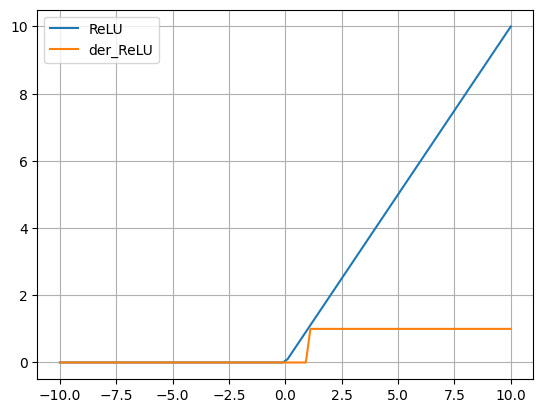

In [ ]:
y = [relu(i) for i in x]
dy = [relu_d(i) for i in x]

plt.plot(x, y, label='ReLU')
plt.plot(x, dy, label='der_ReLU')
plt.legend()
plt.grid()
plt.show()

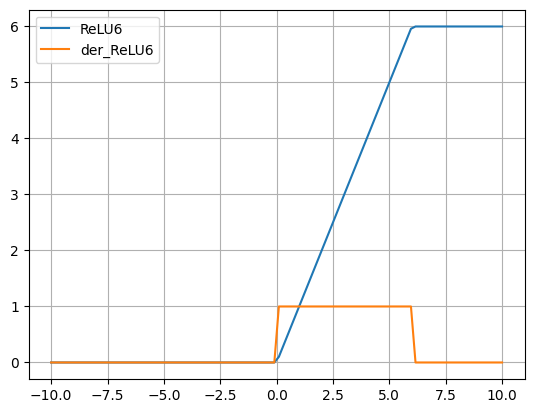

In [ ]:
y = [relu6(i) for i in x]
dy = [relu6_d(i) for i in x]

plt.plot(x, y, label='ReLU6')
plt.plot(x, dy, label='der_ReLU6')
plt.legend()
plt.grid()
plt.show()

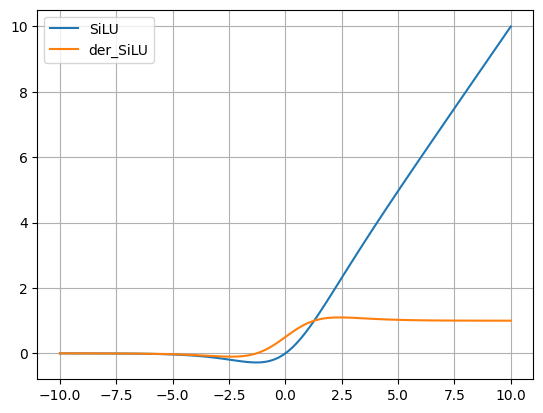

In [ ]:
y = [silu(i) for i in x]
dy = [silu_d(i) for i in x]

plt.plot(x, y, label='SiLU')
plt.plot(x, dy, label='der_SiLU')
plt.legend()
plt.grid()
plt.show()

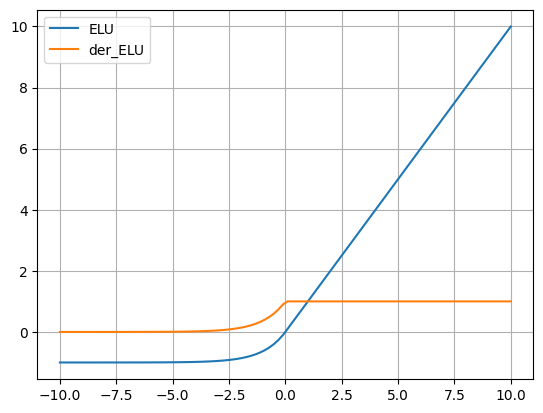

In [ ]:
y = [elu(i) for i in x]
dy = [elu_d(i) for i in x]

plt.plot(x, y, label='ELU')
plt.plot(x, dy, label='der_ELU')
plt.legend()
plt.grid()
plt.show()

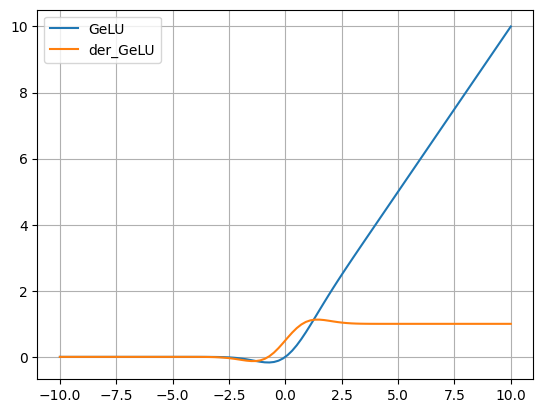

In [ ]:
y = [gelu(i) for i in x]
dy = [gelu_d(i) for i in x]

plt.plot(x, y, label='GeLU')
plt.plot(x, dy, label='der_GeLU')
plt.legend()
plt.grid()
plt.show()

## Losses

In [36]:
## Ініціалізуємо справжні данні для кожної функції

y_real = np.array([0, 1])

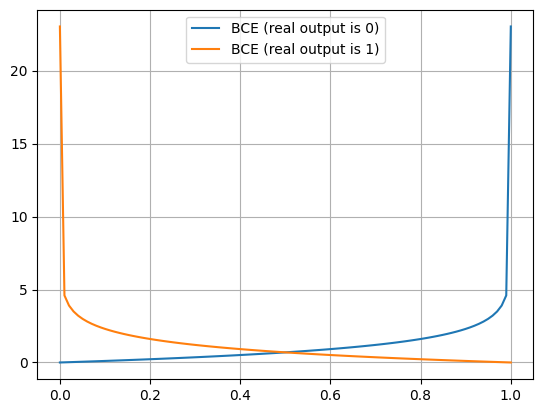

In [30]:
y_pred = np.linspace(0, 1, 100)
bce_res0 = [bce(y_real[0], i) for i in y_pred]
bce_res1 = [bce(y_real[1], i) for i in y_pred]

plt.plot(y_pred, bce_res0, label='BCE (real output is 0)')
plt.plot(y_pred, bce_res1, label='BCE (real output is 1)')
plt.legend()
plt.grid()
plt.show()

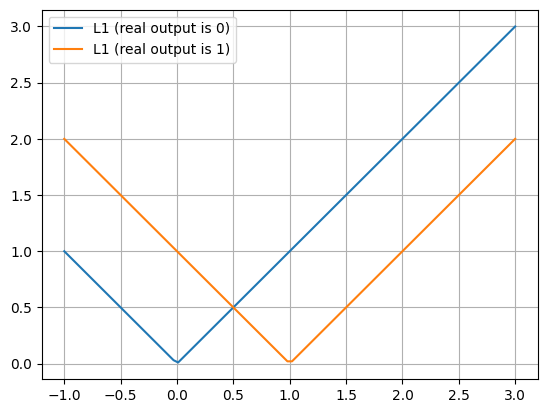

In [35]:
y_pred = np.linspace(-1, 3, 100)
l1_res0 = [mae(y_real[0], i) for i in y_pred]
l1_res1 = [mae(y_real[1], i) for i in y_pred]

plt.plot(y_pred, l1_res0, label='L1 (real output is 0)')
plt.plot(y_pred, l1_res1, label='L1 (real output is 1)')
plt.legend()
plt.grid()
plt.show()

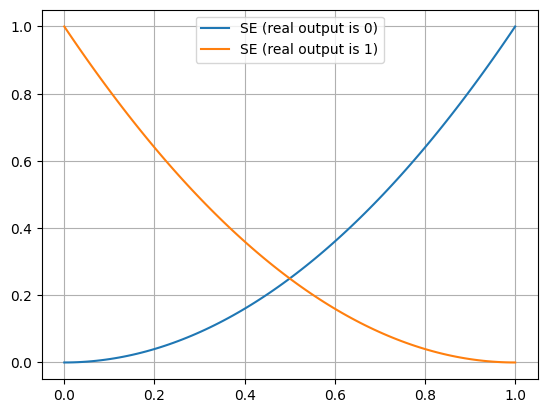

In [37]:
y_pred = np.linspace(0, 1, 100)
se_res0 = [se(y_real[0], i) for i in y_pred]
se_res1 = [se(y_real[1], i) for i in y_pred]

plt.plot(y_pred, se_res0, label='SE (real output is 0)')
plt.plot(y_pred, se_res1, label='SE (real output is 1)')
plt.legend()
plt.grid()
plt.show()